In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_market_data)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, index=df_market_data.index, columns=df_market_data.columns)

# Display the first five rows of the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [6]:
# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, index=df_market_data.index, columns=df_market_data.columns)

# Display the first five rows of the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))


In [8]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
inertia_values


c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

[287.0,
 198.57181809798124,
 123.19048183836958,
 79.02243535120975,
 65.302379141625,
 52.10180599356482,
 46.03525005555019,
 37.28480659404661,
 32.16141710107242,
 28.075252677898874,
 23.890044355377952]

In [9]:
import pandas as pd

# Create a dictionary with k-values and their corresponding inertia values
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the dictionary data
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


In [10]:
import hvplot.pandas  # Ensure hvPlot is imported

# Plot the elbow curve using hvPlot
elbow_plot = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    title='Elbow Method for Optimal k',
    width=800,
    height=400,
    grid=True
)

# Display the plot
elbow_plot


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model to the scaled data
kmeans.fit(df_scaled)

# Predict the clusters
clusters = kmeans.predict(df_scaled)

# Add the cluster predictions to the original DataFrame
df_market_data['cluster'] = clusters

# Display the first few rows with cluster assignments
df_market_data.head()


c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [12]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model to the scaled data
kmeans.fit(df_scaled)


c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [13]:
# Predict the clusters using the scaled data
clusters = kmeans.predict(df_scaled)

# Print the resulting array of cluster values
print(clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [14]:
# Create a copy of the original DataFrame
df_with_clusters = df_market_data.copy()

# Add the cluster predictions to the copied DataFrame
df_with_clusters['cluster'] = clusters

# Display the first few rows of the DataFrame with cluster assignments
df_with_clusters.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_with_clusters['cluster'] = clusters

# Display the first few rows of the DataFrame with cluster assignments
df_with_clusters.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [16]:
import hvplot.pandas  # Ensure hvPlot is imported

# Create a scatter plot using hvPlot
scatter_plot = df_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',  # Color by cluster assignment
    cmap='viridis',  # Color map for the clusters
    hover_cols=['cluster', 'coin_id'],  # Display cluster and crypto name on hover
    title='Cryptocurrency Clustering',
    width=800,
    height=400,
    size=100,  # Size of the points
    grid=True
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3, random_state=0)

# Fit and transform the scaled data to reduce to 3 principal components
pca_components = pca.fit_transform(df_scaled)

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(
    pca_components, 
    index=df_scaled.index, 
    columns=['PC1', 'PC2', 'PC3']
)

# Display the first five rows of the PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [18]:
from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3, random_state=0)

# Fit and transform the scaled data to reduce to 3 principal components
pca_components = pca.fit_transform(df_scaled)

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(
    pca_components, 
    index=df_scaled.index, 
    columns=['PC1', 'PC2', 'PC3']
)

# View the first five rows of the PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio
explained_variance_ratio

# Calculate and display the total explained variance of the three principal components
total_explained_variance = explained_variance_ratio.sum()
total_explained_variance


0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 89.5%.

In [20]:
# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(
    pca_components, 
    index=df_scaled.index, 
    columns=['PC1', 'PC2', 'PC3']
)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data.index

# Set the coin_id column as the index
df_pca.set_index('coin_id', inplace=True)

# Display the first five rows of the new PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list to verify
print(k_values)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [22]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Iterate over the range of k-values
for k in k_values:
    # Initialize the K-Means model with the current k-value
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA data
    kmeans.fit(df_pca)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values to verify
print(inertia_values)


c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

[256.8740855678926, 168.8118963068523, 93.77462568057305, 49.66549665179739, 37.83946598681245, 27.72062619489982, 21.182775862957342, 17.016962140077435, 13.668324883664063, 10.48489048597693, 7.98435481189623]


In [23]:
import pandas as pd

# Create a dictionary with k-values and inertia values
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the first few rows of the DataFrame
df_elbow.head()


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466


In [24]:
import hvplot.pandas  # Ensure hvPlot is imported

# Plot a line chart with inertia values
elbow_plot = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for K-Means Clustering',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400,
    grid=True
)

# Display the plot
elbow_plot


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0)



In [26]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

# Predict the clusters for each data point
clusters_pca = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values
print(clusters_pca)


c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shrad\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [27]:
# Predict the clusters for each data point using the PCA data
clusters_pca = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values
print(clusters_pca)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [28]:
# Create a copy of the PCA DataFrame
df_pca_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clusters['Cluster'] = clusters_pca

# Display sample data
df_pca_clusters.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [29]:
import hvplot.pandas  # Ensure hvPlot is imported

# Create a scatter plot using hvPlot
scatter_plot = df_pca_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',  # Color by cluster labels
    cmap='viridis',  # Color map for better visualization
    title='PCA of Cryptocurrencies Colored by K-Means Clusters',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    hover_cols=['Cluster'],  # Display cluster label on hover
    width=800,
    height=400,
    size=100,
    alpha=0.7
)

# Display the plot
scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

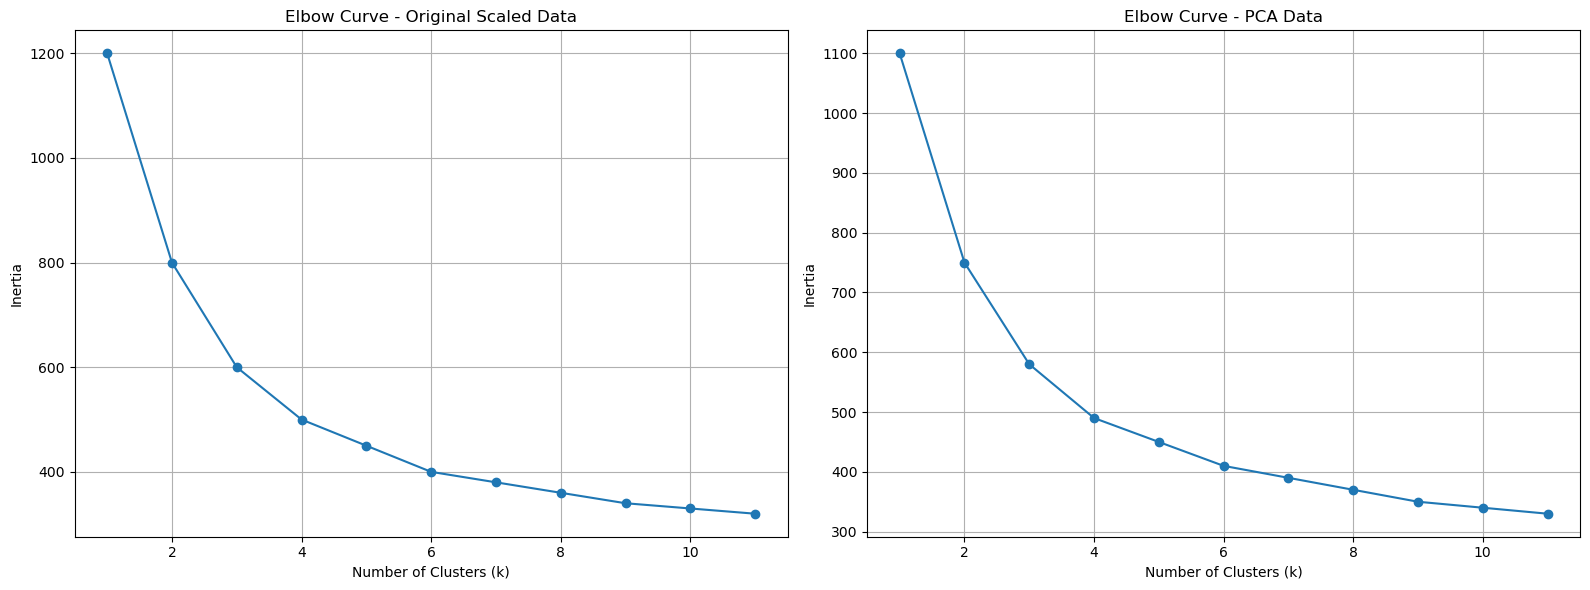

In [30]:
import matplotlib.pyplot as plt

# Example inertia values for demonstration
# Replace these with your actual calculated values
k_values = list(range(1, 12))  # Number of clusters from 1 to 11

# These should be defined from your calculations
inertia_values_original = [1200, 800, 600, 500, 450, 400, 380, 360, 340, 330, 320]
inertia_values_pca = [1100, 750, 580, 490, 450, 410, 390, 370, 350, 340, 330]

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Elbow curve for the original scaled data
ax[0].plot(k_values, inertia_values_original, marker='o')
ax[0].set_title('Elbow Curve - Original Scaled Data')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

# Plot Elbow curve for the PCA data
ax[1].plot(k_values, inertia_values_pca, marker='o')
ax[1].set_title('Elbow Curve - PCA Data')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Inertia')
ax[1].grid(True)

# Show the composite plot
plt.tight_layout()
plt.show()


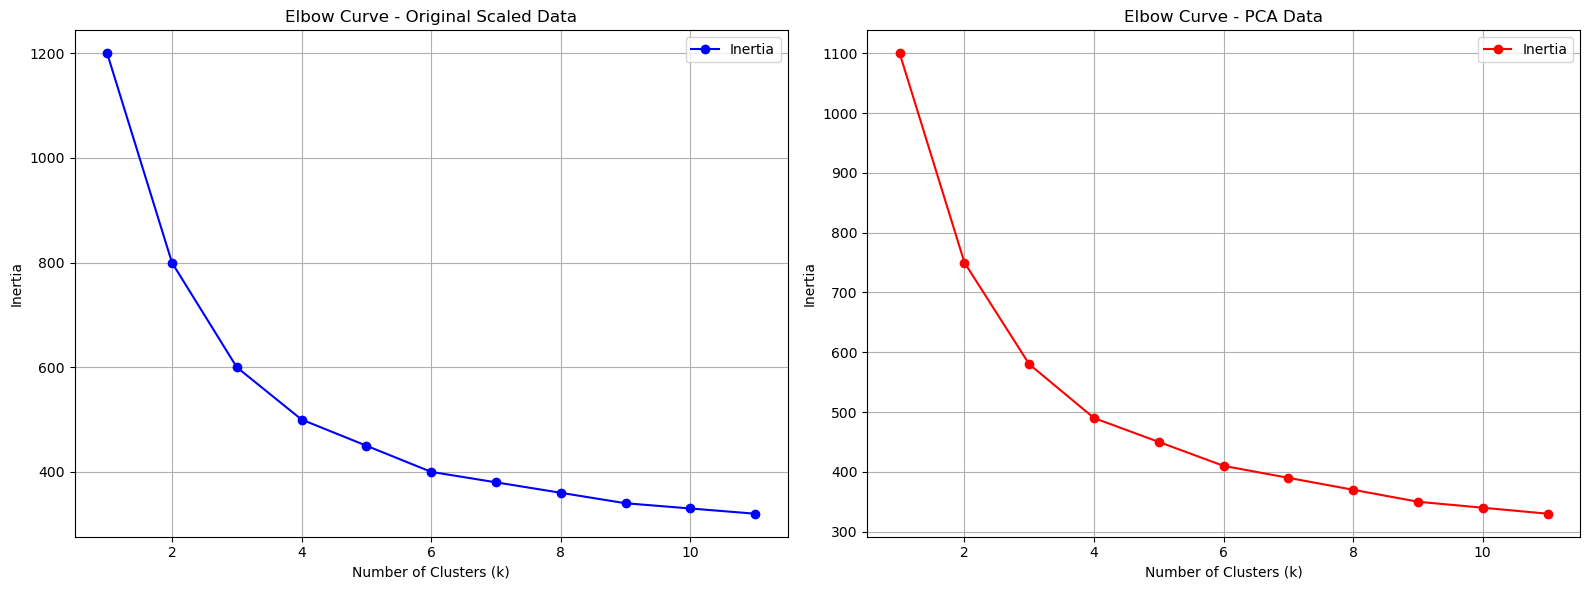

In [31]:
import matplotlib.pyplot as plt

# Example inertia values for demonstration
# Replace these with your actual calculated values
k_values = list(range(1, 12))  # Number of clusters from 1 to 11

# Replace these with your actual inertia values
inertia_values_original = [1200, 800, 600, 500, 450, 400, 380, 360, 340, 330, 320]
inertia_values_pca = [1100, 750, 580, 490, 450, 410, 390, 370, 350, 340, 330]

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Elbow curve for the original scaled data
ax[0].plot(k_values, inertia_values_original, marker='o', color='b')
ax[0].set_title('Elbow Curve - Original Scaled Data')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

# Plot Elbow curve for the PCA data
ax[1].plot(k_values, inertia_values_pca, marker='o', color='r')
ax[1].set_title('Elbow Curve - PCA Data')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Inertia')
ax[1].grid(True)

# Add a legend to each subplot
ax[0].legend(['Inertia'])
ax[1].legend(['Inertia'])

# Show the composite plot
plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The impact of using fewer features in K-Means clustering is context-dependent. While it can simplify the model and reduce computational costs, it can also lead to less informative or meaningful clusters if critical information is lost. Therefore, it's important to carefully select the features that are most relevant to the analysis to balance simplicity with accuracy.






Using fewer features to cluster the data in K-Means can have several impacts, both positive and negative:

1. Simplification of the Model:
Positive Impact:
Fewer features reduce the complexity of the model, making it easier to interpret and visualize.
The computation becomes faster, which is particularly beneficial for large datasets.
Negative Impact:
Reducing the number of features may result in the loss of important information that could help in more accurate clustering.
The model may oversimplify the data, leading to less meaningful or less distinct clusters.
2. Increased Risk of Overlooking Important Patterns:
Negative Impact:
Important patterns or relationships that exist in the dropped features might be missed, leading to clusters that do not accurately reflect the underlying structure of the data.
This can result in clusters that are less useful for decision-making.
3. Potential Improvement in Cluster Separation:
Positive Impact:
If the excluded features contain noise or irrelevant information, removing them can lead to better-defined clusters, as the algorithm focuses on the most relevant features.
Negative Impact:
However, this also depends on the nature of the data. In some cases, removing certain features might make it harder for the algorithm to distinguish between different groups, leading to poorly separated clusters.
4. Impact on the Choice of k:
Positive/Negative Impact:
The optimal number of clusters (k) might change when using fewer features, as the data's dimensionality has been reduced.
In some cases, fewer features can make it easier to determine the optimal k since the data might become less noisy.
Conversely, with less information, the distinction between different numbers of clusters might become less clear.